In [1]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')

from analysis.scripts.QEC import carbon_ramsey_analysis as cr
import sys
import os
%matplotlib inline 

reloaded
reloaded


## Tomo for pos/neg data

In [ ]:
130206
from analysis.scripts.QEC import Two_Qubit_Tomography as Tomo2
tag = '_tau0_1.03e-05_part0_'
Tomo2.BarPlotTomoContrast(tag = tag,return_data = False)


## Gate calibration

In [ ]:
### Gate calibration, Version 3: Try a set of 9 tau,N combinations to find optimum1

from analysis.scripts.QEC import Carbon_gate_calibration_v2 as carbon_calib_v2; reload(carbon_calib_v2)

#carbon_calib_v2.get_gate_fidelity(carbon = 1,older_than='20151214_135000')
#carbon_calib_v2.get_gate_fidelity(carbon = 2)
carbon_calib_v2.get_gate_fidelity(carbon = 3,older_than= None)



# Gate Calibration Multiple Taus

reloaded
reloaded
----------------------------------------
C2: work in progress
d:\measuring\data\20170807\164614_SSRO_calib_MWInit_Pippin_SIL3_SSROCalibration_MWInit
Number of parts for carbon 2: 25
parts to be analyzed: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]


d:/measuring\analysis\lib\math\error.py:70: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if uncertainties == None:


Gate 62: Blochvec. length of: 1.097172 at N = 46,
tau = 4.892e-06
Gate 60: Blochvec. length of: 1.093265 at N = 42,
tau = 4.892e-06
Gate 61: Blochvec. length of: 1.043418 at N = 44,
tau = 4.892e-06
Gate 57: Blochvec. length of: 1.039977 at N = 36,
tau = 4.892e-06
Gate 59: Blochvec. length of: 1.039360 at N = 40,
tau = 4.892e-06


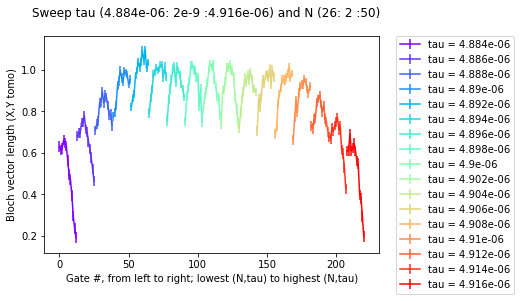

Analysis complete, have a nice day!


In [2]:
sys.path.append(r'D:/measuring/analysis/scripts/purification')
%matplotlib inline 
import Carbon_gate_calibration_vP as ccP
reload(ccP)

'''
Analysis script to analyze gate calibrations

Usage
The function allows 3 types of graphs which can be turned on and off by setting the following keywords to true:
1.) plot_fidelity: Plots fidelity bar graphs
2.) plot_gate_time: Plots gate time (N*tau) vs. fidelity
3.) line_fidelity: Plots a line graph of version one for compactness

To only look at a specific number of taus, specify tau_nrs. Ex: tau_nrs = [0,3]
To only view specific parts specify parts. Ex: parts = [1]

Comparison of different taus is in progress
'''

# gates1, gate_values1, b1, b_u1 = ccP.get_gate_fidelity(carbon = 5, 
#             newer_than='20160128_090000', older_than= None, tau_nrs = [0],
#             plot_fidelity = False, gate_time = False, return_data = True, line_fidelity = False, ssro_tstamp = '180819')
# gates2, gate_values2, b2, b_u2 = ccP.get_gate_fidelity(carbon = 5, 
#             newer_than='20160127_180000', older_than= '20160127_230000', tau_nrs = [2],
#             plot_fidelity = False, gate_time = False, return_data = True, line_fidelity = False, ssro_tstamp = '180819')
# ccP.line_plot_fidelity(gates = [gates1,gates2], gate_values = None, b = [b1,b2],b_u = [b_u1,b_u2])
# ccP.plot_gate_time(gates = [gates1,gates2], gate_values =[gate_values1,gate_values2], b = [b1,b2],b_u = [b_u1,b_u2])
# ccP.bar_plot_fidelity(gates = gates1, gate_values = gate_values1, b = b1, b_u = b_u1)

# See Guide. 
carbons = [2]
#182341_Sweep_carbon_Gate__C3_negative_tau0_3.688e-06_part15_
for c in carbons:
    print  '-'*40
    print 'C' + str(c) + ': work in progress'
    ccP.gate_sweep_analysis(carbon = c,
                newer_than= '20170731_000000', older_than= '20170731_240000',tau_nrs=[0],
                plot_fidelity = False, gate_time = False, return_data = False, line_fidelity = True)


In [ ]:
### Gate calibration, multiple tau blocks for positive and negative readout
import sys
import os
sys.path.append(r'D:/measuring/analysis/scripts/purification')

%matplotlib inline 
import Carbon_gate_calibration_vP as ccP
reload(ccP)

fig = plt.figure()
# ccP.get_gate_fidelity(carbon = 5, newer_than='20160123_114000', older_than= '20160123_200000', tau_nrs = [0,1,2,3],
#                      plot_fidelity = False, plot_gate_time = True)
# ccP.get_gate_fidelity(carbon = 5, newer_than='20160128_090000', older_than= None, tau_nrs = [0],
#                      plot_fidelity = False, plot_gate_time = False,plot_graph=True)#, ssro_tstamp = '180407')
x1,y1,y1_u=ccP.get_gate_fidelity(carbon = 5, newer_than='20160128_090000', older_than= None, tau_nrs = [2],
                     plot_fidelity = False, plot_gate_time = False,plot_graph = False)#, ssro_tstamp = '180407')
x2,y2,y2_u=ccP.get_gate_fidelity(carbon = 5, newer_than='20160127_180000', older_than= '20160127_230000', tau_nrs = [2],
                      plot_fidelity = False, plot_gate_time = False,plot_graph = False)#, ssro_tstamp = '180407')
plt.errorbar(x1,y1,y1_u)
plt.errorbar(x2,y2,y2_u)


## Frequency Calibration

In [ ]:
### DD frequency calibration ###
reload(cr)
Result=cr.Carbon_Ramsey_DD_freq(frequency =448e3, offset = 0.5, amplitude = 0.4,exponent=1,carbon= 8,
                        decay_constant =0.01,phase =0, plot_fit = True, show_guess = False,fixed = [2,4])

In [ ]:
### Single frequency ###
reload(cr)
Result=cr.Carbon_Ramsey(title = 'sweep_N', frequency =0.5e3, offset = 0.5, amplitude = 0.4,exponent=1,  
                        decay_constant =100,phase =0, plot_fit = True, show_guess = True,fixed = [2,3,4])

In [ ]:
### Phase sweep ###
reload(cr)
Result=cr.Carbon_Ramsey(timestamp='20150421_135423' , 
                        offset = 0.5, amplitude = 0.1, x0=0, decay_constant = 1e5, exponent = 2, 
                        frequency = 1/360., phase =0, 
                        plot_fit = True, show_guess = False,fixed = [0,2,3,4,5])

## Single carbon init

In [ ]:
from analysis.scripts.QEC import Two_Qubit_Tomography as Tomo2
reload(Tomo2)
### carbon init
carbons =[1]#,2,3,4,5,6,7]
init_methods =['MBI'] ### 'swap' or 'MBI'

for c in carbons:
    for init_method in init_methods:
        Tomo2.BarPlotTomoContrast(tag = '_'+str(c)+'_'+init_method,return_data = True)
        

In [ ]:
import itertools
from analysis.scripts.mbi import mbi_data_general_fits as fits; reload(fits)

carbons = [2,4,5]
for carbon_pair in itertools.permutations(carbons, 2):
    
    tag = "on_C%d_Gate_on_C%d" % carbon_pair
    
    Result = fits.exp_sin(timestamp=  None, contains = tag,
                      offset=[0.5], amplitude = [0.5], center = [0], decay_constant = [5000e-3], 
                      exp_power = [3],
                      frequency = [430e3], phase =[0], 
                      fixed = [0,2,3,4],
                      ylim = None,
                      plot_fit = False, do_print = False, show_guess = False,
                     correct_ionization = False)
    

In [ ]:
from analysis.scripts.QEC import Two_Qubit_Tomography as Tomo2
reload(Tomo2)

Tomo2.BarPlotTomoContrast(return_data = True)